In [674]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

import sys
sys.path.insert(0, '../fem')
from gaussianrandomfields import *

In [675]:
size = 21

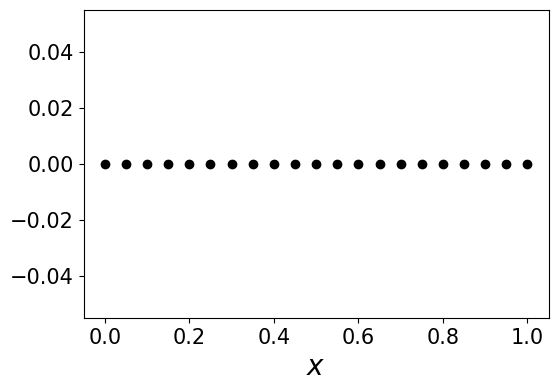

In [678]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(np.linspace(0,1,size),np.zeros(size), color='black')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$f_i=f(x_i)$', fontsize=size_axeslabels)
# ax.grid()

plt.savefig("1dgrid.pdf", bbox_inches='tight')

In [639]:
x = np.linspace(0,1,size)
cov = np.zeros((size,size))
l = 0
for i in range(size):
    for j in range(size):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))

/tmp/ipykernel_3951223/3859952558.py:6: RuntimeWarning: invalid value encountered in double_scalars
  cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))
/tmp/ipykernel_3951223/3859952558.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))


Text(0, 0.5, '$i$')

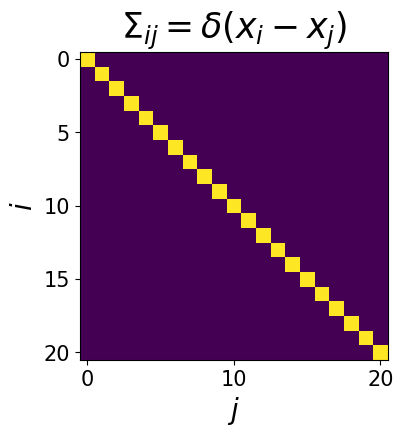

In [640]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(np.identity(size))
ax.set_title(r"$\Sigma_{ij}=\delta(x_i - x_j)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)

# plt.savefig("1dcovdelta.svg", bbox_inches='tight')

In [641]:
f = np.random.multivariate_normal(np.zeros(size), cov=np.identity(size), size=1)
f.shape

(1, 21)

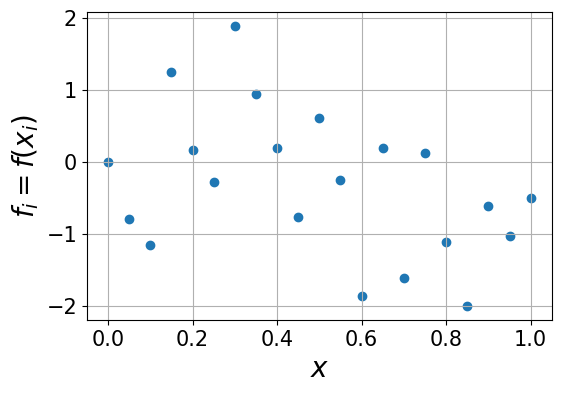

In [642]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(np.linspace(0,1,size),f.T)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$f_i=f(x_i)$', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dgrfdelta.pdf", bbox_inches='tight')

In [643]:
size = 21
x = np.linspace(0,1,size)
cov = np.zeros((size,size))
l = 0.2
for i in range(size):
    for j in range(size):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))

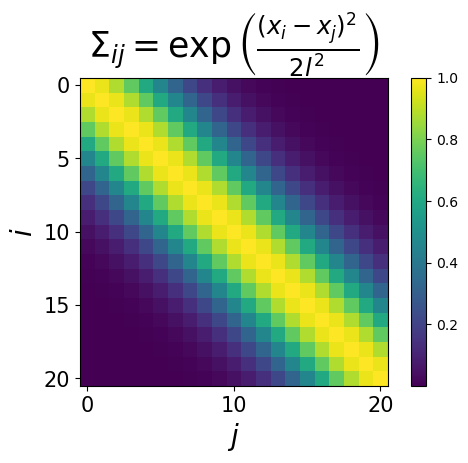

In [644]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(cov)
ax.set_title(r"$\Sigma_{ij}=\exp\left(\frac{(x_i - x_j)^2}{2l^2}\right)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)
plt.colorbar(fig)

# plt.savefig("1dcovgaussian.pdf", bbox_inches='tight')

In [645]:
f = np.random.multivariate_normal(np.zeros(size), cov=cov, size=1)

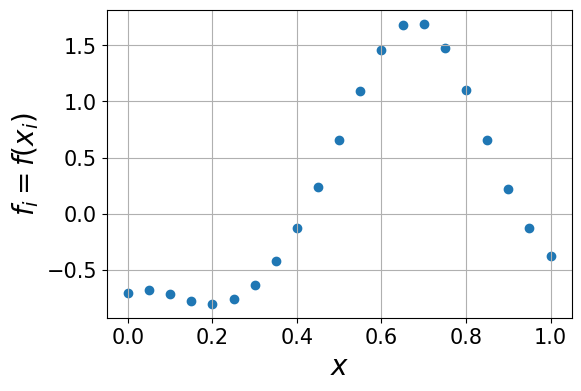

In [646]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(np.linspace(0,1,size),f.T)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$f_i=f(x_i)$', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dgrfgaussian.svg", bbox_inches='tight')

In [647]:
GRF = f

GRF = GRF.flatten()
function = Rbf(x, GRF, function='gaussian', epsilon=0.2)

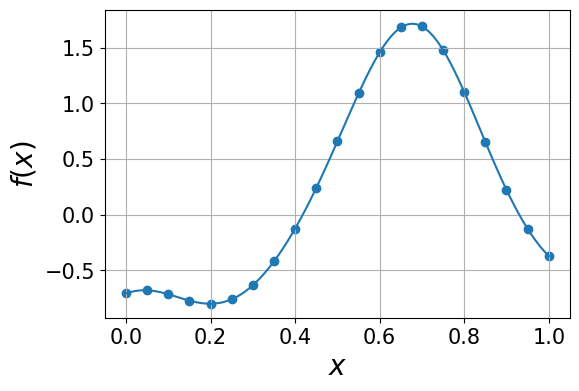

In [648]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

x_plot = np.linspace(0,1,100)
ax.plot(x_plot, function(x_plot))
fig = ax.scatter(np.linspace(0,1,size),f.T)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$f(x)$', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dRBFint.pdf", bbox_inches='tight')

In [679]:
size = 21
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
x.shape

(441, 2)

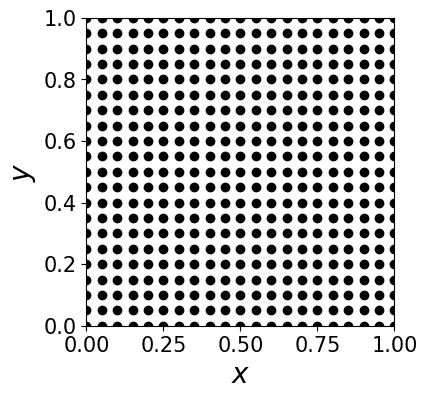

In [681]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], color='black')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')

plt.savefig("2dgrid.pdf", bbox_inches='tight')

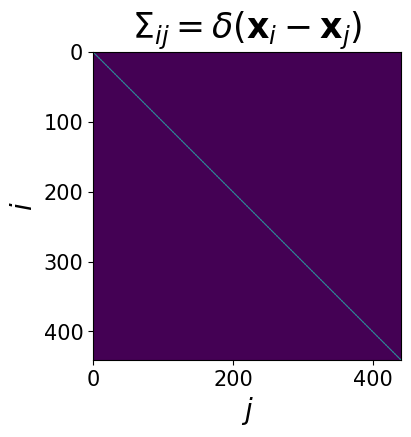

In [683]:
size=21
cov = np.identity(size**2)

size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(cov)
ax.set_title(r"$\Sigma_{ij}=\delta(\mathbf{x}_i - \mathbf{x}_j)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)

plt.savefig("2dcovdelta.svg", bbox_inches='tight')

In [653]:
f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)
# Deltaf = np.amax(f) - np.amin(f)
# f = f/Deltaf*0.97
# f = f - np.amin(f) + 0.02
# f = f.flatten()

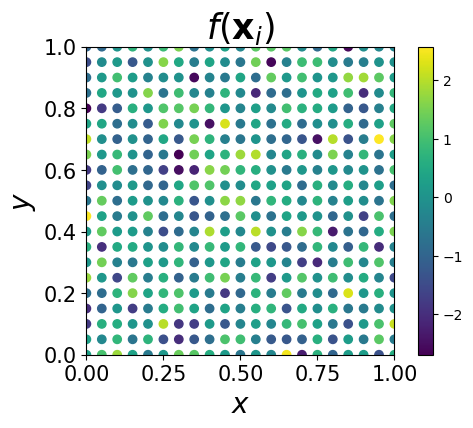

In [655]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], c=f)
ax.set_title(r"$f(\mathbf{x}_i)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dgrfdelta.svg", bbox_inches='tight')

In [656]:
N_gridpoints = 21
l = 0.2
#Compute covariance matrix of points on a grid
X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
cov = np.zeros((N_gridpoints**2,N_gridpoints**2))
for i in range(N_gridpoints**2):
    for j in range(N_gridpoints**2):
        cov[i,j] = np.exp(-np.sum((x[i] - x[j])**2, axis=-1)/(2*l**2))

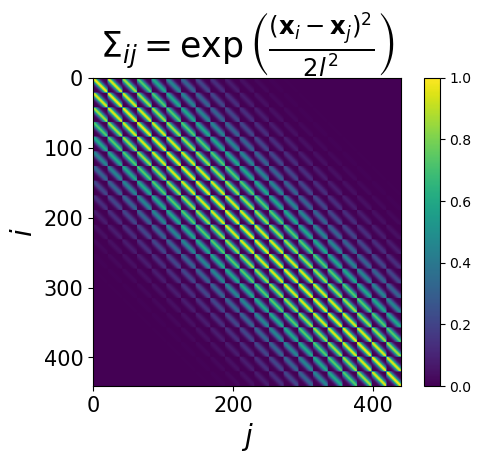

In [662]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(cov)
ax.set_title(r"$\Sigma_{ij}=\exp\left(\frac{(\mathbf{x}_i - \mathbf{x}_j)^2}{2l^2}\right)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)
plt.colorbar(fig)

plt.savefig("2dcovgaussian.svg", bbox_inches='tight')

In [663]:
f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)
# Deltaf = np.amax(f) - np.amin(f)
# f = f/Deltaf*0.97
# f = f - np.amin(f) + 0.02
# f = f.flatten()

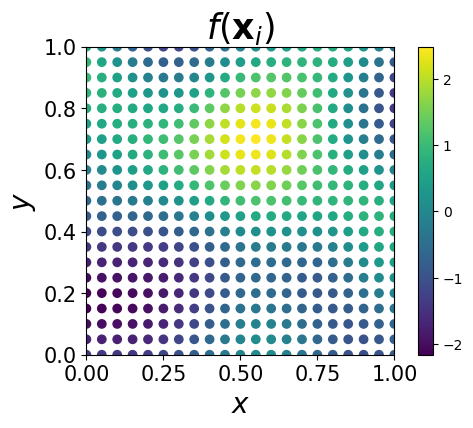

In [667]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], c=f)
ax.set_title(r"$f(\mathbf{x}_i)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

plt.savefig("2dgrfgaussian.pdf", bbox_inches='tight')

In [668]:
from scipy.interpolate import RBFInterpolator
from scipy.interpolate import Rbf

In [671]:
function = Rbf(x[:,0], x[:,1], f, function='gaussian', epsilon=0.2)

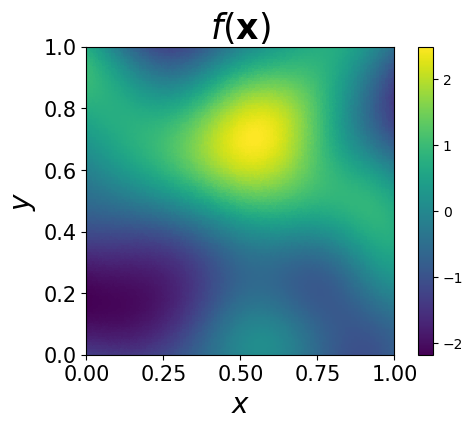

In [673]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x_i[:,0], x_i[:,1], f_i)
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

plt.savefig("2dRBFint.svg", bbox_inches='tight')

In [ ]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], c=f)
ax.set_title(r"$f(\mathbf{x}_i)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

plt.savefig("2dgrfgaussian.pdf", bbox_inches='tight')

In [274]:
function.function

'gaussian'

In [278]:
x_i.shape

(10000, 2)

In [270]:
print(np.amax(f_i))
print(np.amin(f_i))

0.9901410043239594
0.015519142150878906


In [232]:
x_i.shape

(10000, 2)

In [69]:
d = 2
N_gridpoints = 21
l = 0.2
positive = True

X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T

cov = np.zeros((N_gridpoints**2,N_gridpoints**2))
for i in range(N_gridpoints**2):
    for j in range(N_gridpoints**2):
        cov[i,j] = np.exp(-np.sum((x[i] - x[j])**2, axis=-1)/(2*l**2))
        
GRF = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)

if positive==True:    
    DeltaGRF = np.amax(GRF) - np.amin(GRF)
    GRF = GRF/DeltaGRF*0.97
    GRF = GRF - np.amin(GRF) + 0.02

    GRF = GRF.flatten()

GRFfunction = RBFInterpolator(x, GRF, kernel='gaussian', epsilon=1/(1/N_gridpoints - 1))
from scipy.interpolate import Rbf

In [70]:
GRFfunction = RBFInterpolator(x, GRF, kernel='gaussian', epsilon=1/(1/N_gridpoints - 1))

In [71]:
a = np.array([0.1,0.1])
GRFfunction(a[None,:])

array([-0.015625])

In [385]:
N_gridpoints = 21
x = np.linspace(0,1,N_gridpoints)
cov = np.zeros((N_gridpoints,N_gridpoints))
l = 0.4
for i in range(N_gridpoints):
    for j in range(N_gridpoints):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))
        
GRF = np.random.multivariate_normal(np.zeros(N_gridpoints), cov=cov, size=1)

DeltaGRF = np.amax(GRF) - np.amin(GRF)
GRF = GRF/DeltaGRF*2
GRF = GRF - np.amin(GRF) - 1 

GRF = GRF.flatten()
function = Rbf(x, GRF, function='gaussian', epsilon=l)

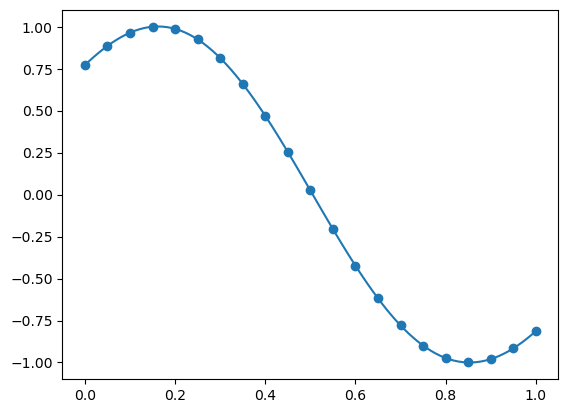

In [386]:
x_plot = np.linspace(0,1,100)
plt.scatter(x,GRF)
plt.plot(x_plot, function(x_plot))

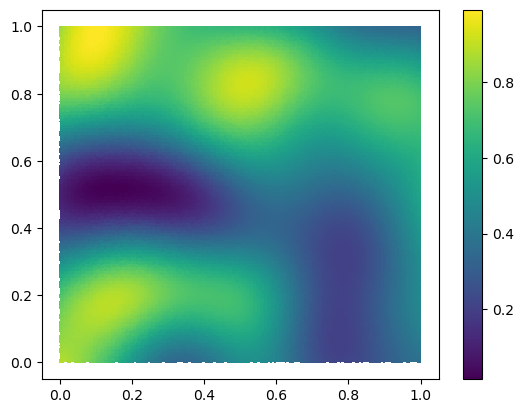

In [297]:
N_gridpoints = 21 
l = 0.2 
positive = True

GRFfunction2D = GRF2D(N_gridpoints, l, positive)

size = 100
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x_2D = np.vstack([X.ravel(), Y.ravel()]).T
f_2D = GRFfunction2D(x_2D[:,0], x_2D[:,1])
plt.tripcolor(x_2D[:,0], x_2D[:,1], f_2D)
plt.colorbar()

/home/prins/st8/anaconda3/lib/python3.10/site-packages/scipy/interpolate/_rbf.py:267: LinAlgWarning: Ill-conditioned matrix (rcond=2.92963e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


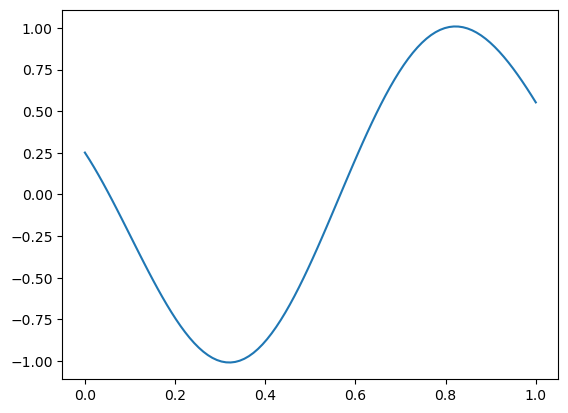

In [309]:
N_gridpoints = 21 
l = 0.4

GRFfunction1D = GRF1D(N_gridpoints, l)

size = 100
x_1D = np.linspace(0,1,size)

f_1D = GRFfunction1D(x_1D)
plt.plot(x_1D,f_1D)

(1,)


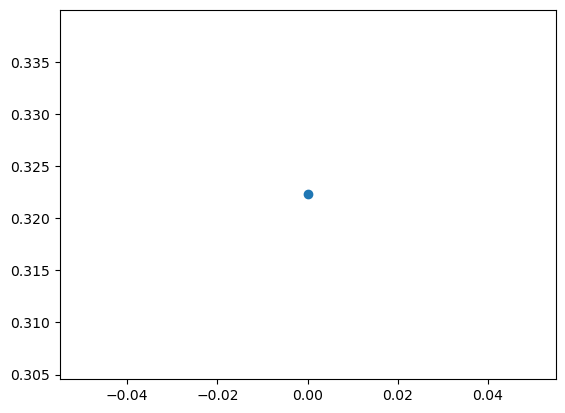

In [302]:
N_gridpoints = 21 
l = 0.2 

GRFfunction1D = GRF1D(N_gridpoints, l)

size = 1
x_1D = np.linspace(0,1,size)
print(x_1D.shape)
f_1D = GRFfunction1D(x_1D)
plt.scatter(x_1D,f_1D)

In [308]:
a = np.array([0.1])
print(a.shape)
print(GRFfunction1D(a).shape)

(1,)
(1,)
